In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

In [55]:
df = pd.read_csv('data/cancer_classification.csv')

In [56]:
# df.info()

In [57]:
# df.describe().transpose()

In [58]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

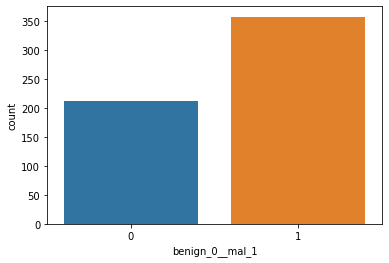

In [59]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

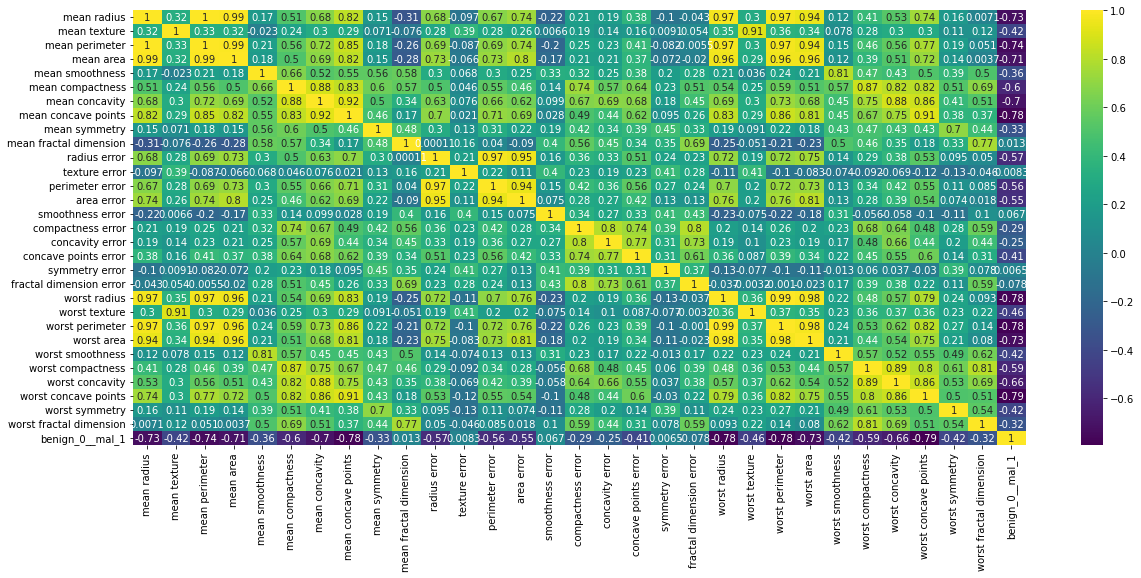

In [60]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [61]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<AxesSubplot:>

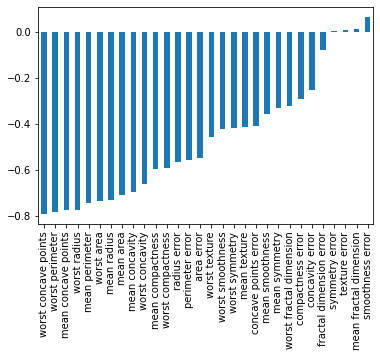

In [62]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

Train Test Split

In [63]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [64]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Scaling

In [66]:
scaler = MinMaxScaler()

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create model (Binary classification... Binary Crossentropy)

In [68]:
X_train.shape

(426, 30)

In [69]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Train the model

In [70]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size=20,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/400
22/22 [==============================] - 1s 13ms/step - loss: 0.6789 - val_loss: 0.6575
Epoch 2/400
22/22 [==============================] - 0s 9ms/step - loss: 0.6420 - val_loss: 0.6065
Epoch 3/400
22/22 [==============================] - 0s 9ms/step - loss: 0.5813 - val_loss: 0.5244
Epoch 4/400
22/22 [==============================] - 0s 9ms/step - loss: 0.5057 - val_loss: 0.4449
Epoch 5/400
22/22 [==============================] - 0s 10ms/step - loss: 0.4340 - val_loss: 0.3710
Epoch 6/400
22/22 [==============================] - 0s 9ms/step - loss: 0.3692 - val_loss: 0.3064
Epoch 7/400
22/22 [==============================] - 0s 9ms/step - loss: 0.3124 - val_loss: 0.2554
Epoch 8/400
22/22 [==============================] - 0s 8ms/step - loss: 0.2699 - val_loss: 0.2205
Epoch 9/400
22/22 [==============================] - 0s 9ms/step - loss: 0.2381 - val_loss: 0.1900
Epoch 10/400
22/22 [==============================] - 0s 9ms/step - loss: 0.2155 - val_loss: 0.1722
Epoch 1

In [71]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

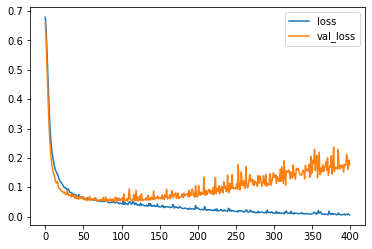

In [72]:
model_loss.plot()

In [73]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)

In [74]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [75]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6873 - val_loss: 0.6722
Epoch 2/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6747 - val_loss: 0.6558
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6654 - val_loss: 0.6373
Epoch 4/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6416 - val_loss: 0.6109
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6205 - val_loss: 0.5762
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5853 - val_loss: 0.5284
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5430 - val_loss: 0.4717
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4971 - val_loss: 0.4155
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4531 - val_loss: 0.3567
Epoch 10/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4015 - val_loss: 0.3055

<AxesSubplot:>

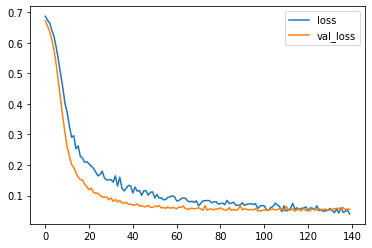

In [76]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [83]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [84]:
predictions

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [85]:
print(confusion_matrix(y_test,predictions))

[[53  1]
 [ 2 87]]


In [93]:
df.shape

(569, 31)

In [123]:
random_img1 = df.drop('benign_0__mal_1', axis=1).iloc[278]
random_img2 = df.drop('benign_0__mal_1', axis=1).iloc[256]

In [124]:
random_img1 = scaler.transform(random_img1.values.reshape(-1,30))
random_img2 = scaler.transform(random_img2.values.reshape(-1,30))

In [125]:
random_img1

array([[0.2888976 , 0.27494082, 0.272585  , 0.17244486, 0.24239415,
        0.0723923 , 0.04679007, 0.06153082, 0.21676455, 0.11036226,
        0.05305088, 0.17808522, 0.04363191, 0.02879727, 0.06893973,
        0.02269655, 0.02689394, 0.0955484 , 0.10373661, 0.00798751,
        0.24932388, 0.37526652, 0.22581465, 0.12790294, 0.22977654,
        0.05373321, 0.11032473, 0.17817869, 0.15178395, 0.06434385]])

In [126]:
random_img2

array([[0.5807826 , 0.6445722 , 0.60947503, 0.44477817, 0.36083777,
        0.64009314, 0.41799438, 0.56858847, 0.38761345, 0.26032013,
        0.26474742, 0.18537836, 0.30160675, 0.1860261 , 0.15783391,
        0.34095893, 0.09755051, 0.28774389, 0.21422972, 0.15053273,
        0.59834807, 0.64632196, 0.63092878, 0.42238984, 0.38667391,
        0.55524319, 0.4424438 , 0.66701031, 0.24699389, 0.38538488]])

In [128]:
(model.predict(random_img1) > 0.5).astype("float32")

1/1 [==============================] - 0s 14ms/step


array([[1.]], dtype=float32)

In [129]:
(model.predict(random_img2) > 0.5).astype("float32")

1/1 [==============================] - 0s 14ms/step


array([[0.]], dtype=float32)

In [130]:
actual1 = df.iloc[278]['benign_0__mal_1']
actual2 = df.iloc[256]['benign_0__mal_1']

In [134]:
mod1 = (model.predict(random_img1) > 0.5).astype("int32")
pred1 = mod1.reshape(mod1.shape[0],)

1/1 [==============================] - 0s 12ms/step


In [135]:
mod2 = (model.predict(random_img2) > 0.5).astype("int32")
pred2 = mod2.reshape(mod2.shape[0],)

1/1 [==============================] - 0s 13ms/step


In [136]:
print(f'actual: [{actual1}]')
print(f'predicted: {pred1}')

actual image 1: [1.0]
predicted image 1: [1]


In [137]:
print(f'actual: [{actual2}]')
print(f'predicted: {pred2}')

actual image 2: [0.0]
predicted image 2: [0]
